D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


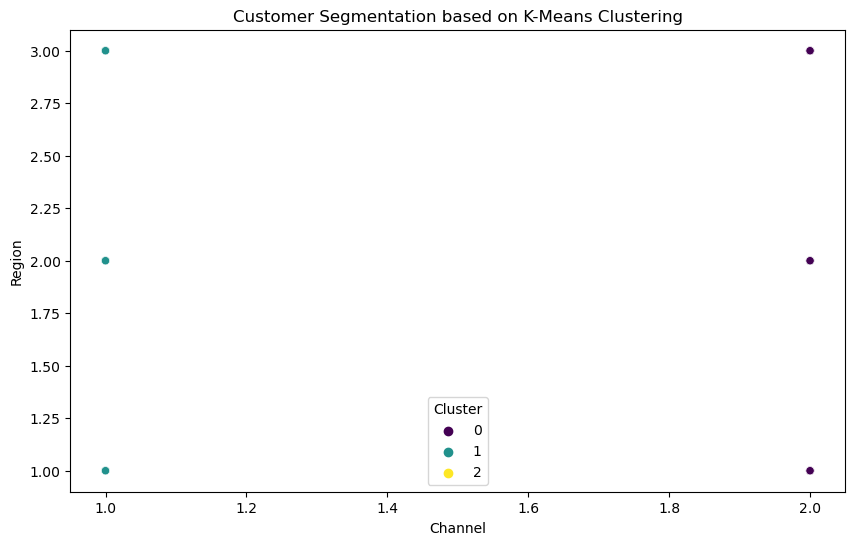

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Wholesale customers data.csv')

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster assignments to the data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Channel', y='Region', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on K-Means Clustering')
plt.show()


D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

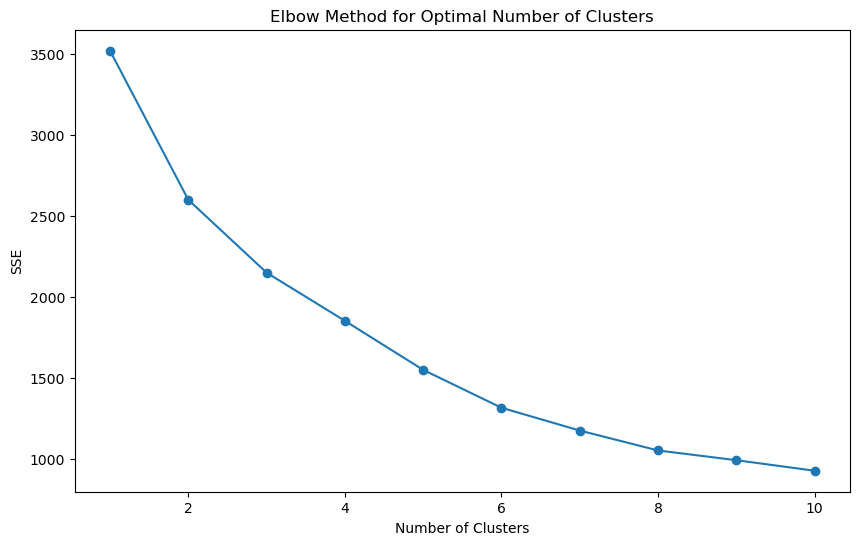

D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

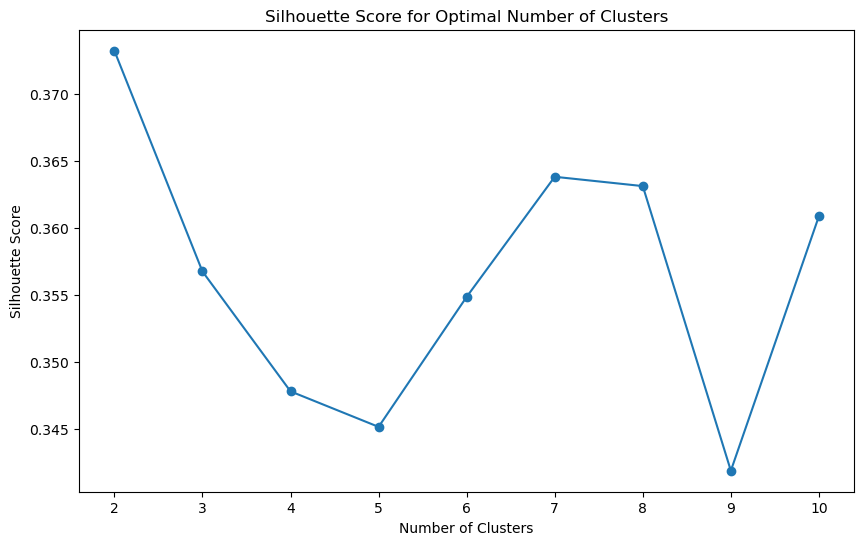

In [4]:
# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

from sklearn.metrics import silhouette_score

# Silhouette Score to determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(score)

# Plot the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()



In [5]:
# Analyze and interpret the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
cluster_centers_df['Cluster'] = range(3)

# Print the cluster centers
print("Cluster Centers:\n", cluster_centers_df)

# Compare the clusters
data.groupby('Cluster').mean().plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Clusters based on Spending Behavior')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.show()


ValueError: Length of values (3) does not match length of index (10)

In [ ]:
import scipy.cluster.hierarchy as shc

# Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical_clusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clusters.fit_predict(data_scaled)

# Add the hierarchical cluster labels to the data
data['HierarchicalCluster'] = hierarchical_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Channel', y='Region', hue='HierarchicalCluster', palette='viridis')
plt.title('Customer Segmentation based on Hierarchical Clustering')
plt.show()
